#**Overview:**
This notebook loads the metadata and negbio label csv files and adds the labels to each study.
Then the data are filtered for studies only relevant to pneumonia and
the image path to each image is also added as a new column to the merged dataframe.

Additionally some EDA is done on the view position of each x-ray, as well as the distribution of the pneumonia labels (0 for negative, 1 for postive and -1 for inconclusive)
Further EDA on the dataset is done in the : ______ notebook

Finally, the dataframe is saved to a csv file, along with filtered versions of it containing subsets of the full data.
Since not all images are accesible on google drive (parts 15-19 are accesible)
and only the 'AP' and 'PA' view positions are used, the final filtered csv file will most likely be used for the ViT model

Load the labels and images metadata

In [1]:
from IPython.display import Audio
import numpy as np

def beep():
    audio = Audio(0.00025 * np.sin(2 * np.pi * 220 * np.linspace(0, 0.15, int(44100 * 0.15), endpoint=False)),
      rate=44100, autoplay=True)
    display(audio)
    return None

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Dissertation"
metadata = pd.read_csv(path+"/mimic-cxr-2.0.0-metadata.csv")
negbio_labels = pd.read_csv(path+"/mimic-cxr-2.0.0-negbio.csv")

Mounted at /content/drive


In [3]:
# adding the image file paths to the dataframe
with open('/content/drive/MyDrive/Dissertation/IMAGE_FILENAMES', 'r') as f:
    all_image_paths = f.readlines()
all_image_paths[:5]

['files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg\n',
 'files/p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.jpg\n',
 'files/p10/p10000032/s53189527/2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab.jpg\n',
 'files/p10/p10000032/s53189527/e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c.jpg\n',
 'files/p10/p10000032/s53911762/68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714.jpg\n']

In [4]:
metadata['img_path'] = all_image_paths
metadata['img_path'] = metadata['img_path'].str.strip()
metadata.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,img_path
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect,files/p10/p10000032/s50414267/02aa804e-bde0afd...
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect,files/p10/p10000032/s53189527/e084de3b-be89b11...
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN,files/p10/p10000032/s53911762/68b5c4b1-227d048...


In [ ]:
metadata['img_path'][0]

'files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg'

In [5]:
#Selecting only studies relevant to pneumonia
negbio_labels = negbio_labels.drop(['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumothorax', 'Support Devices'], axis=1)
negbio_labels = negbio_labels.dropna()
negbio_labels

,subject_id,study_id,Pneumonia
4,10000764,57375967,-1.0
7,10000935,50578979,1.0
8,10000935,51178377,-1.0
13,10000980,50985099,-1.0
14,10000980,51967283,1.0
...,...,...,...
227796,19998770,51149538,0.0
227801,19998843,56350227,1.0
227805,19999068,54061983,-1.0
227808,19999068,59390811,-1.0


In [8]:
negbio_labels['subject_id'].nunique()

59185

In [ ]:
# Merge on study_id
pneumonia_imgs = pd.merge(metadata, negbio_labels, on='study_id')

# Selecting only the studies with view position PA or AP
# pneumonia_imgs = pneumonia_imgs[pneumonia_imgs['ViewPosition'].isin(['AP','PA'])]


In [ ]:
pneumonia_imgs.columns

Index(['dicom_id', 'subject_id_x', 'study_id',
       'PerformedProcedureStepDescription', 'ViewPosition', 'Rows', 'Columns',
       'StudyDate', 'StudyTime', 'ProcedureCodeSequence_CodeMeaning',
       'ViewCodeSequence_CodeMeaning',
       'PatientOrientationCodeSequence_CodeMeaning', 'img_path',
       'subject_id_y', 'Pneumonia'],
      dtype='object')

In [ ]:
# check to see if the two subject_id columns are the same
counter = 0
for i in range(len(pneumonia_imgs)):
  if pneumonia_imgs['subject_id_x'].iloc[i] != pneumonia_imgs['subject_id_y'].iloc[i]:
    print(i)
    break
  elif pneumonia_imgs['subject_id_x'].iloc[i] == pneumonia_imgs['subject_id_y'].iloc[i]:
    counter+=1

print(counter, len(pneumonia_imgs))

98730 98730


In [ ]:
# remoiving all columns that are not needed
pneumonia_imgs
pneumonia_imgs = pneumonia_imgs.drop(['PerformedProcedureStepDescription', 'Rows', 'Columns',
       'StudyDate', 'StudyTime', 'ProcedureCodeSequence_CodeMeaning',
       'ViewCodeSequence_CodeMeaning',
       'PatientOrientationCodeSequence_CodeMeaning', 'subject_id_y',],axis=1)

In [ ]:
pneumonia_imgs

,dicom_id,subject_id_x,study_id,ViewPosition,img_path,Pneumonia
0,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,10000764,57375967,AP,files/p10/p10000764/s57375967/096052b7-d256dc4...,-1.0
1,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,10000764,57375967,LATERAL,files/p10/p10000764/s57375967/b79e55c3-735ce5a...,-1.0
2,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,10000764,57375967,LATERAL,files/p10/p10000764/s57375967/dcfeeac4-1597e31...,-1.0
3,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,10000935,50578979,AP,files/p10/p10000935/s50578979/d0b71acc-b5a6204...,1.0
4,3be619d1-506a66cf-ff1ab8a1-2efb77bb-fe7d59fc,10000935,51178377,LATERAL,files/p10/p10000935/s51178377/3be619d1-506a66c...,-1.0
...,...,...,...,...,...,...
98725,23ba9adb-5344e3bc-0a9e5a61-80f56ec1-df4c0a97,19998843,56350227,AP,files/p19/p19998843/s56350227/23ba9adb-5344e3b...,1.0
98726,86292c07-43af46ea-0649f4b2-feecce77-91866b79,19999068,54061983,NaN,files/p19/p19999068/s54061983/86292c07-43af46e...,-1.0
98727,4ae61651-0f1f0738-07991a0b-42f9e4d2-74cb632c,19999068,59390811,NaN,files/p19/p19999068/s59390811/4ae61651-0f1f073...,-1.0
98728,9c44a9e5-7a8fcfa1-cb6b451f-1d1ac993-5312b1c2,19999270,55274188,NaN,files/p19/p19999270/s55274188/9c44a9e5-7a8fcfa...,0.0


In [ ]:
# checking label distribution
pneumonia_imgs['Pneumonia'].value_counts()

,count
Pneumonia,
0.0,44447
-1.0,29168
1.0,25115


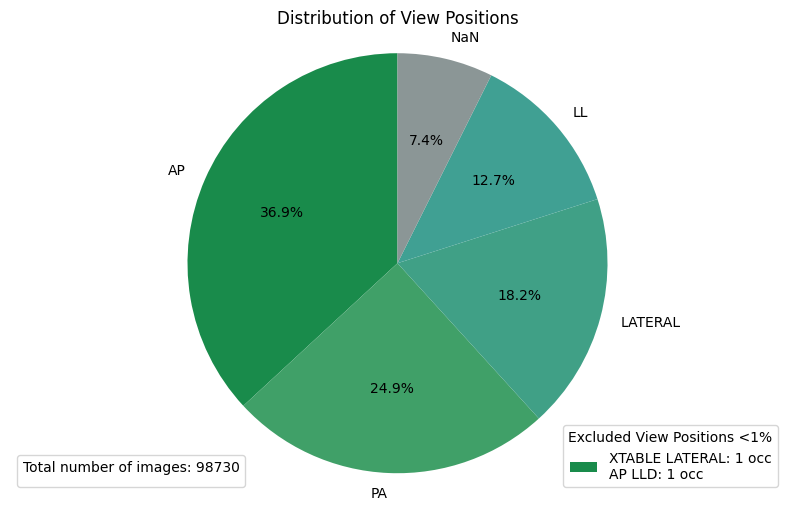

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = pneumonia_imgs['ViewPosition'].fillna('NaN').value_counts()

# Filter out low count values
threshold = 2
low_counts = value_counts[value_counts <= threshold]
value_counts = value_counts[value_counts > threshold]


colors = ['#198b4b', '#40a068', '#40a086', '#40a093','#8b9696']

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of View Positions')
plt.axis('equal')

# Create legend for low count values
legend_text = "\n".join([f"{label}: {count} occ" for label, count in low_counts.items()])
legend1 = plt.legend([legend_text], loc='lower right', title="Excluded View Positions <1%")
plt.gca().add_artist(legend1)

# Create the second legend for total image count
plt.legend([], loc='lower left',title = f"Total number of images: {len(pneumonia_imgs)}")
plt.show()

In [ ]:
# number of unique values in study_id column
pneumonia_imgs['study_id'].nunique(),len(pneumonia_imgs)

(59185, 98730)

In [ ]:
# parts = ['p17', 'p18', 'p19']
# pneumonia_imgs = pneumonia_imgs[pneumonia_imgs['img_path'].str.contains('|'.join(parts))]
# pneumonia_imgs.reset_index(drop=True, inplace=True)
# pneumonia_imgs

,dicom_id,subject_id_x,study_id,ViewPosition,img_path,Pneumonia
0,116f3a27-3fcec414-3864f913-a6e4c6fe-54b07918,17000103,50666068,PA,files/p17/p17000103/s50666068/116f3a27-3fcec41...,1.0
1,af8c0228-46da1384-bf4046bb-c343dfc0-297bb754,17000103,50666068,PA,files/p17/p17000103/s50666068/af8c0228-46da138...,1.0
2,6c4ebb06-a2d96f2b-c2502de2-89cf4c0d-064b6f50,17000103,51540539,PA,files/p17/p17000103/s51540539/6c4ebb06-a2d96f2...,1.0
3,8a842057-b6dfdc3f-fac1b8b6-4e6ee2d6-ffbc98e6,17000103,51540539,PA,files/p17/p17000103/s51540539/8a842057-b6dfdc3...,1.0
4,27e7d231-59bfd5c3-66e1eda4-ca0d0a8b-8ffacb23,17000103,52381151,PA,files/p17/p17000103/s52381151/27e7d231-59bfd5c...,1.0
...,...,...,...,...,...,...
18262,14c4f70b-51110089-a731e968-fc1e017e-dd4c536b,19997473,57809462,AP,files/p19/p19997473/s57809462/14c4f70b-5111008...,-1.0
18263,a29987d8-abd13298-7a067b12-620f9fdb-103ecf53,19998330,54053771,AP,files/p19/p19998330/s54053771/a29987d8-abd1329...,1.0
18264,518011e2-346dbd44-3e738335-c5006bf8-d69f6b68,19998770,51149538,AP,files/p19/p19998770/s51149538/518011e2-346dbd4...,0.0
18265,1427ad57-5bf4f3e6-90be02f3-d1760987-99d7f2ce,19998843,56350227,AP,files/p19/p19998843/s56350227/1427ad57-5bf4f3e...,1.0


In [ ]:
pneumonia_imgs['Pneumonia'].value_counts()

,count
Pneumonia,
0.0,44447
-1.0,29168
1.0,25115


In [ ]:
error = []
for i in range(len(pneumonia_imgs)-1):
  if pneumonia_imgs['study_id'].iloc[i] == pneumonia_imgs['study_id'].iloc[i+1]:
    if pneumonia_imgs['Pneumonia'].iloc[i] != pneumonia_imgs['Pneumonia'].iloc[i+1]:
      error.append(i)
      print(i)
if len(error)==0:
  print("No errors")

No errors


In [ ]:
# pneumonia_imgs = pneumonia_imgs.groupby('study_id', sort=False).first().reset_index()
pneumonia_imgs['ViewPosition'].value_counts()

,count
ViewPosition,
AP,36409
PA,24557
LATERAL,17954
LL,12536
XTABLE LATERAL,1
AP LLD,1


In [ ]:
pneumonia_imgs = pneumonia_imgs.rename(columns={"Pneumonia": "pneumonia", "subject_id_x": "subject_id"})

pneumonia_imgs

,dicom_id,subject_id,study_id,ViewPosition,img_path,pneumonia
0,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,10000764,57375967,AP,files/p10/p10000764/s57375967/096052b7-d256dc4...,-1.0
1,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,10000764,57375967,LATERAL,files/p10/p10000764/s57375967/b79e55c3-735ce5a...,-1.0
2,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,10000764,57375967,LATERAL,files/p10/p10000764/s57375967/dcfeeac4-1597e31...,-1.0
3,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,10000935,50578979,AP,files/p10/p10000935/s50578979/d0b71acc-b5a6204...,1.0
4,3be619d1-506a66cf-ff1ab8a1-2efb77bb-fe7d59fc,10000935,51178377,LATERAL,files/p10/p10000935/s51178377/3be619d1-506a66c...,-1.0
...,...,...,...,...,...,...
98725,23ba9adb-5344e3bc-0a9e5a61-80f56ec1-df4c0a97,19998843,56350227,AP,files/p19/p19998843/s56350227/23ba9adb-5344e3b...,1.0
98726,86292c07-43af46ea-0649f4b2-feecce77-91866b79,19999068,54061983,NaN,files/p19/p19999068/s54061983/86292c07-43af46e...,-1.0
98727,4ae61651-0f1f0738-07991a0b-42f9e4d2-74cb632c,19999068,59390811,NaN,files/p19/p19999068/s59390811/4ae61651-0f1f073...,-1.0
98728,9c44a9e5-7a8fcfa1-cb6b451f-1d1ac993-5312b1c2,19999270,55274188,NaN,files/p19/p19999270/s55274188/9c44a9e5-7a8fcfa...,0.0


In [ ]:
# number of unique values in study_id column
pneumonia_imgs['study_id'].nunique(),len(pneumonia_imgs)

(59185, 98730)

In [ ]:
#save data to csv files

# pneumonia_imgs.to_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_imgs_full.csv', index=False)

# saveing the dataset with the image paths that are currently in google drive with no filtering
parts = ['p15','p16','p17','p18', 'p19']
pneumonia_imgs = pneumonia_imgs[pneumonia_imgs['img_path'].str.contains('|'.join(parts))]
pneumonia_imgs.reset_index(drop=True, inplace=True)
pneumonia_imgs.to_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_15to19_unfiltered.csv', index=False)

# filtering the view position to exclude lateral  and other images
pneumonia_imgs = pneumonia_imgs[pneumonia_imgs['ViewPosition'].isin(['AP','PA'])]
pneumonia_imgs.to_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_1519_PAAP.csv', index=False)



# pneumonia_imgs = pneumonia_imgs[pneumonia_imgs['ViewPosition'].isin(['AP'])]
# pneumonia_imgs.to_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_1619_AP.csv', index=False)

# # parts = ['p18', 'p19']
# # pneumonia_imgs = pneumonia_imgs[pneumonia_imgs['img_path'].str.contains('|'.join(parts))]
# # pneumonia_imgs.reset_index(drop=True, inplace=True)

# # pneumonia_imgs.to_csv('/content/drive/My Drive/Dissertation/pneumonia2_AP.csv', index=False)

# # parts = ['p19']
# # pneumonia_imgs.reset_index(drop=True, inplace=True)
# # pneumonia_imgs.to_csv('/content/drive/My Drive/Dissertation/pneumonia1_AP.csv', index=False)

In [ ]:
pd.read_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_imgs_full.csv')

,dicom_id,subject_id,study_id,ViewPosition,img_path,pneumonia
0,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,10000764,57375967,AP,files/p10/p10000764/s57375967/096052b7-d256dc4...,-1.0
1,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,10000764,57375967,LATERAL,files/p10/p10000764/s57375967/b79e55c3-735ce5a...,-1.0
2,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,10000764,57375967,LATERAL,files/p10/p10000764/s57375967/dcfeeac4-1597e31...,-1.0
3,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,10000935,50578979,AP,files/p10/p10000935/s50578979/d0b71acc-b5a6204...,1.0
4,3be619d1-506a66cf-ff1ab8a1-2efb77bb-fe7d59fc,10000935,51178377,LATERAL,files/p10/p10000935/s51178377/3be619d1-506a66c...,-1.0
...,...,...,...,...,...,...
98725,23ba9adb-5344e3bc-0a9e5a61-80f56ec1-df4c0a97,19998843,56350227,AP,files/p19/p19998843/s56350227/23ba9adb-5344e3b...,1.0
98726,86292c07-43af46ea-0649f4b2-feecce77-91866b79,19999068,54061983,NaN,files/p19/p19999068/s54061983/86292c07-43af46e...,-1.0
98727,4ae61651-0f1f0738-07991a0b-42f9e4d2-74cb632c,19999068,59390811,NaN,files/p19/p19999068/s59390811/4ae61651-0f1f073...,-1.0
98728,9c44a9e5-7a8fcfa1-cb6b451f-1d1ac993-5312b1c2,19999270,55274188,NaN,files/p19/p19999270/s55274188/9c44a9e5-7a8fcfa...,0.0


In [ ]:
pd.read_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_15to19_unfiltered.csv')

,dicom_id,subject_id_x,study_id,ViewPosition,img_path,Pneumonia
0,043f2b1c-1b8b0a20-c9e5ec5d-02ac7d4a-35000b4c,15000170,56450978,PA,files/p15/p15000170/s56450978/043f2b1c-1b8b0a2...,0.0
1,6b53b66e-2871db03-cfbc3045-4e17bd5b-62902490,15000170,56450978,LL,files/p15/p15000170/s56450978/6b53b66e-2871db0...,0.0
2,a485fd03-fbef8ae5-9c20399c-c15766bb-84f492c6,15000170,56450978,LL,files/p15/p15000170/s56450978/a485fd03-fbef8ae...,0.0
3,39ee0432-150f8ee9-e65abf9a-15bc5beb-80fbf3f6,15000393,51634677,PA,files/p15/p15000393/s51634677/39ee0432-150f8ee...,0.0
4,80eeb158-92ef7719-b43ae606-fb2745cf-99680d44,15000393,51634677,PA,files/p15/p15000393/s51634677/80eeb158-92ef771...,0.0
...,...,...,...,...,...,...
49846,23ba9adb-5344e3bc-0a9e5a61-80f56ec1-df4c0a97,19998843,56350227,AP,files/p19/p19998843/s56350227/23ba9adb-5344e3b...,1.0
49847,86292c07-43af46ea-0649f4b2-feecce77-91866b79,19999068,54061983,NaN,files/p19/p19999068/s54061983/86292c07-43af46e...,-1.0
49848,4ae61651-0f1f0738-07991a0b-42f9e4d2-74cb632c,19999068,59390811,NaN,files/p19/p19999068/s59390811/4ae61651-0f1f073...,-1.0
49849,9c44a9e5-7a8fcfa1-cb6b451f-1d1ac993-5312b1c2,19999270,55274188,NaN,files/p19/p19999270/s55274188/9c44a9e5-7a8fcfa...,0.0


In [ ]:
pd.read_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_1519_PAAP.csv')

,dicom_id,subject_id_x,study_id,ViewPosition,img_path,Pneumonia
0,043f2b1c-1b8b0a20-c9e5ec5d-02ac7d4a-35000b4c,15000170,56450978,PA,files/p15/p15000170/s56450978/043f2b1c-1b8b0a2...,0.0
1,39ee0432-150f8ee9-e65abf9a-15bc5beb-80fbf3f6,15000393,51634677,PA,files/p15/p15000393/s51634677/39ee0432-150f8ee...,0.0
2,80eeb158-92ef7719-b43ae606-fb2745cf-99680d44,15000393,51634677,PA,files/p15/p15000393/s51634677/80eeb158-92ef771...,0.0
3,8a2da5f5-09ea301d-768e059c-5f053a34-2d3b3057,15000393,52929930,PA,files/p15/p15000393/s52929930/8a2da5f5-09ea301...,1.0
4,b08efb71-38c915e9-3d9d7df0-d783d4d6-1317bf59,15000393,54674484,PA,files/p15/p15000393/s54674484/b08efb71-38c915e...,0.0
...,...,...,...,...,...,...
30679,14c4f70b-51110089-a731e968-fc1e017e-dd4c536b,19997473,57809462,AP,files/p19/p19997473/s57809462/14c4f70b-5111008...,-1.0
30680,a29987d8-abd13298-7a067b12-620f9fdb-103ecf53,19998330,54053771,AP,files/p19/p19998330/s54053771/a29987d8-abd1329...,1.0
30681,518011e2-346dbd44-3e738335-c5006bf8-d69f6b68,19998770,51149538,AP,files/p19/p19998770/s51149538/518011e2-346dbd4...,0.0
30682,1427ad57-5bf4f3e6-90be02f3-d1760987-99d7f2ce,19998843,56350227,AP,files/p19/p19998843/s56350227/1427ad57-5bf4f3e...,1.0


In [ ]:
pd.read_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_1619_AP.csv')

,dicom_id,subject_id,study_id,ViewPosition,img_path,pneumonia
0,85529ec9-c55c596f-e379901c-f65abc5d-172404dc,16000210,56889911,AP,files/p16/p16000210/s56889911/85529ec9-c55c596...,1.0
1,29f7cc5b-3bd3f9eb-e9ee64c7-520c7cf0-9fede883,16000210,59788119,AP,files/p16/p16000210/s59788119/29f7cc5b-3bd3f9e...,0.0
2,6076b8ec-c0b08e2e-95895ef3-9fcaea74-643e0a05,16000210,59788119,AP,files/p16/p16000210/s59788119/6076b8ec-c0b08e2...,0.0
3,69593126-d806f316-279e6c3c-f6b95a51-7b609012,16000210,59788119,AP,files/p16/p16000210/s59788119/69593126-d806f31...,0.0
4,a2608dc6-f0c506c6-58964901-4a036ce6-e429e4d1,16000210,59788119,AP,files/p16/p16000210/s59788119/a2608dc6-f0c506c...,0.0
...,...,...,...,...,...,...
14344,14c4f70b-51110089-a731e968-fc1e017e-dd4c536b,19997473,57809462,AP,files/p19/p19997473/s57809462/14c4f70b-5111008...,-1.0
14345,a29987d8-abd13298-7a067b12-620f9fdb-103ecf53,19998330,54053771,AP,files/p19/p19998330/s54053771/a29987d8-abd1329...,1.0
14346,518011e2-346dbd44-3e738335-c5006bf8-d69f6b68,19998770,51149538,AP,files/p19/p19998770/s51149538/518011e2-346dbd4...,0.0
14347,1427ad57-5bf4f3e6-90be02f3-d1760987-99d7f2ce,19998843,56350227,AP,files/p19/p19998843/s56350227/1427ad57-5bf4f3e...,1.0
